<div style='background-image: url("./images/header_l3.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Handling Waveform Data</div>
        </div>
    </div>
</div>

---
## Instrument Response
* rm_insResp(stream, pzfile, prefilt=[0.005,0.1,10.0,40.0], pztype='dis', plot=False, save=False)

In [ ]:
%matplotlib inline
import instrument_resp
import obspy
st = obspy.read('./data/TPUB.HHE.IES_BATS.01_2016.036.sac')
dt = obspy.UTCDateTime("2016-02-05T19:57:26.100000")
ot = st.slice(dt, dt + 300)
instrument_resp.rm_insResp(ot, './data/TPUB.HHE.IES_BATS.01.20090219_99999999.pz',
                          [0.005,0.1,10.0,40.0], pztype='vel', plot=True)
# ot.write('slice_DPDB.HHZ.CWB_BB.01_2013.153.sac', 'SAC')

---
## Cross-Correlation Function
* xcorr_pick_correction(pick1, trace1, pick2, trace2, t_before, t_after, cc_maxlag, filter=None, filter_options={}, plot=False, filename=None)

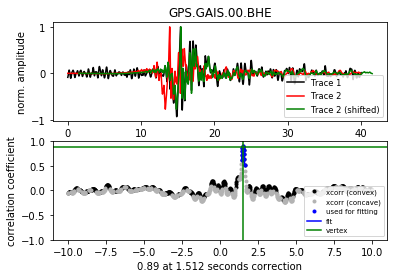

In [7]:
%matplotlib inline
import warnings
import obspy
from obspy.signal.cross_correlation import xcorr_pick_correction

warnings.filterwarnings('ignore')

st1 = obspy.read('./data/GPS_GAIS_00_BHE_V.sac')
st2 = obspy.read('./data/SM_KAU047_00_BHE_V.sac')
tr1 = st1[0]
tr1.filter('bandpass', freqmin=0.01, freqmax=2.0, corners=4, zerophase=False)
tr2 = st2[0]
tr2 = tr2.decimate(4, strict_length=False, no_filter=True)
t1 = obspy.UTCDateTime("2016-02-05T19:57:26.100000Z")
t2 = obspy.UTCDateTime("2016-02-05T19:57:26.100000Z")
dt, coeff = xcorr_pick_correction(t1, tr1, t2, tr2, 0.00, 30.0, 10.0, plot=True)

---
## Map & KML

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

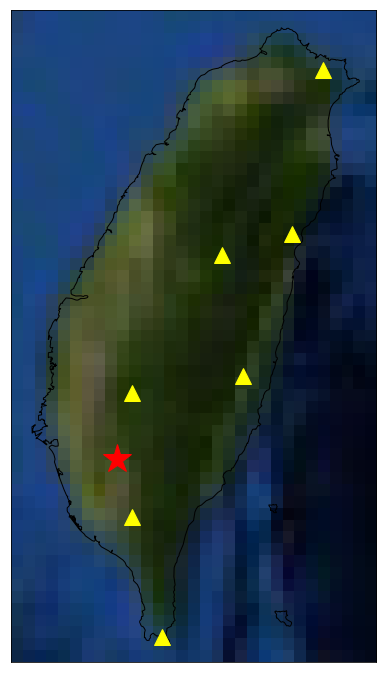

In [9]:
gmtDf = pd.read_table("./data/station_info.gmt", sep='\s+', names=['lon', 'lat', 'sta'])
fig = plt.figure(figsize=(24,12))
m = Basemap(projection='merc',llcrnrlat=21.8,urcrnrlat=25.4,\
            llcrnrlon=119.9,urcrnrlon=122.1,lat_ts=23,resolution='h')
# m.fillcontinents(color='coral',lake_color='aqua')
# m.drawmapboundary(fill_color='aqua')
m.bluemarble()
m.drawcoastlines()

lons = list(gmtDf['lon'])
lats = list(gmtDf['lat'])
x,y = m(lons, lats)
m.plot(x, y, color='yellow', marker='^', markersize=16, linewidth=0)

eq_lon, eq_lat = [120.54], [22.93]
x,y = m(eq_lon, eq_lat)
m.plot(x, y, color='red', marker='*', markersize=30, linewidth=0)

plt.show()
fig.savefig("Station.png")

### How to use kml file to find the proper EQ for analyzing.
Open google earth.

---
## Homework 1 (03/20)
1. plot original two month seismic waveform. 
2. Slice the waveform data in 180s where you can see the EQ. signal. (At least 2 events)
#### For each earthquake:
3. Remove instrument response to show the true velocity values.
4. FFT to transform the seismogram into frequency domain and plot the spectrum.
#### Summary:
5. Map your seismic stations and epicenters.
6. Prepare your results in PPT (about 5 mins) and present your results on 03/27.